<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/StudiKasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload')

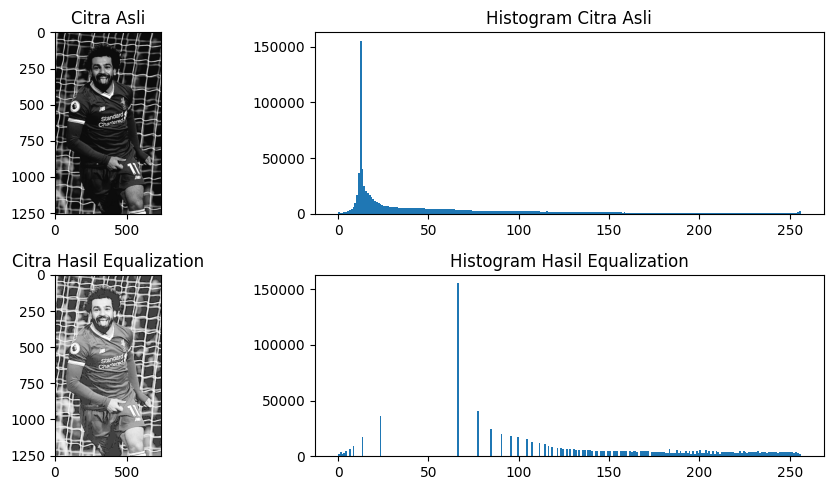

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

# Fungsi untuk menangani unggahan gambar
def process_image(uploaded_image):
    image = Image.open(BytesIO(uploaded_image['content'])).convert('L')
    image_np = np.array(image)

    # Langkah 1: Hitung dan tampilkan histogram dari citra asli
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(image_np, cmap='gray')
    plt.title("Citra Asli")

    plt.subplot(2, 2, 2)
    plt.hist(image_np.ravel(), 256, [0, 256])
    plt.title("Histogram Citra Asli")

    # Langkah 2: Lakukan histogram equalization pada citra
    equalized_image = cv2.equalizeHist(image_np)

    # Langkah 3: Hitung dan tampilkan histogram dari citra hasil equalization
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Citra Hasil Equalization")

    plt.subplot(2, 2, 4)
    plt.hist(equalized_image.ravel(), 256, [0, 256])
    plt.title("Histogram Hasil Equalization")

    # Langkah 4: Tampilkan perbandingan citra asli dan hasil equalization
    plt.tight_layout()
    plt.show()

# Widget unggah file
upload_button = widgets.FileUpload(
    accept='.jpg, .jpeg, .png',
    multiple=False
)

# Fungsi untuk memproses gambar saat diunggah
def on_upload_change(change):
    if len(upload_button.value) > 0:
        uploaded_image = list(upload_button.value.values())[0]
        process_image(uploaded_image)

upload_button.observe(on_upload_change, names='value')
display(upload_button)
